**Name** : Adrian Joseph Santoso

**Student Number** : 10427052

**Section** : 006

## **1. Data Description**  

The dataset includes **players.csv** and **sessions.csv**, but this project will focus only on **players.csv**, which contains player details like experience level, subscription status, and demographics.  

#### **Players Dataset (`players.csv`)**  
- **`experience` (String)**: Player’s skill level (**Pro, Veteran, Amateur, or Regular**).  
- **`subscribe` (Boolean)**: Indicates if a player is a PLAICRAFT subscriber.  
- **`hashedEmail` (String)**: Unique identifier for session linkage.  
- **`played_hours` (Float)**: Total hours played.  
- **`name` (String)**: Player’s first name.  
- **`gender` (String)**: **Male, Female, or Non-binary**.  
- **`Age` (Integer)**: Player’s age in years (**2 missing values**).  

#### **Data Summary and Issues**  
The dataset contains **196 player records**, but missing values in **`Age`** may impact calculations, requiring data filtering before analysis.

## **2. Questions**  

This project explores which types of players contribute the most data, helping improve matchmaking and personalized experiences.  

#### **Specific Question**  
Can a **Regular** player's `age` and `gender` predict their total accumulated playing hours (`played_hours`)?  

#### **Hypothesis**  
Players with higher **played hours** likely have more experience, while older players may have different gaming habits. **Subscription status** and **gender** may affect engagement and playstyle, influencing skill development. Analyzing `played_hours`, `age`, `gender`, and `subscribe` can reveal patterns in player behavior and experience levels.  

#### **Plan on Data Wrangling**  
- Load **players.csv** and remove rows with missing values.  
- Select `experience`, `age`, `gender`, and `played_hours`.  
- Filter to include only **Regular** players.

## **3. Exploratory Data Analysis and Visualization**

In [1]:
library(repr)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players <- read_csv("data/players.csv")

players_filtered <- players |>
                    select(experience, played_hours, Age, gender) |>
                    filter(experience == "Regular") |>
                    drop_na(Age)

players_filtered 

quantitative_summary <- players |>
                    select(played_hours, Age) |>
                    summarise(
                        mean_age = mean(Age, na.rm = TRUE),
                        mean_played_hours = mean(played_hours, na.rm = TRUE)
                    )

quantitative_summary

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,played_hours,Age,gender
<chr>,<dbl>,<dbl>,<chr>
Regular,0.1,21,Male
Regular,0.0,19,Female
Regular,0.6,19,Male
Regular,0.3,8,Male
Regular,0.6,28,Female
Regular,0.0,17,Male
Regular,5.6,17,Male
Regular,0.0,23,Prefer not to say
Regular,218.1,20,Non-binary


mean_age,mean_played_hours
<dbl>,<dbl>
20.52062,5.845918


**Result:** The average player age is 20.52 years, and the average total playtime is 5.85 hours.

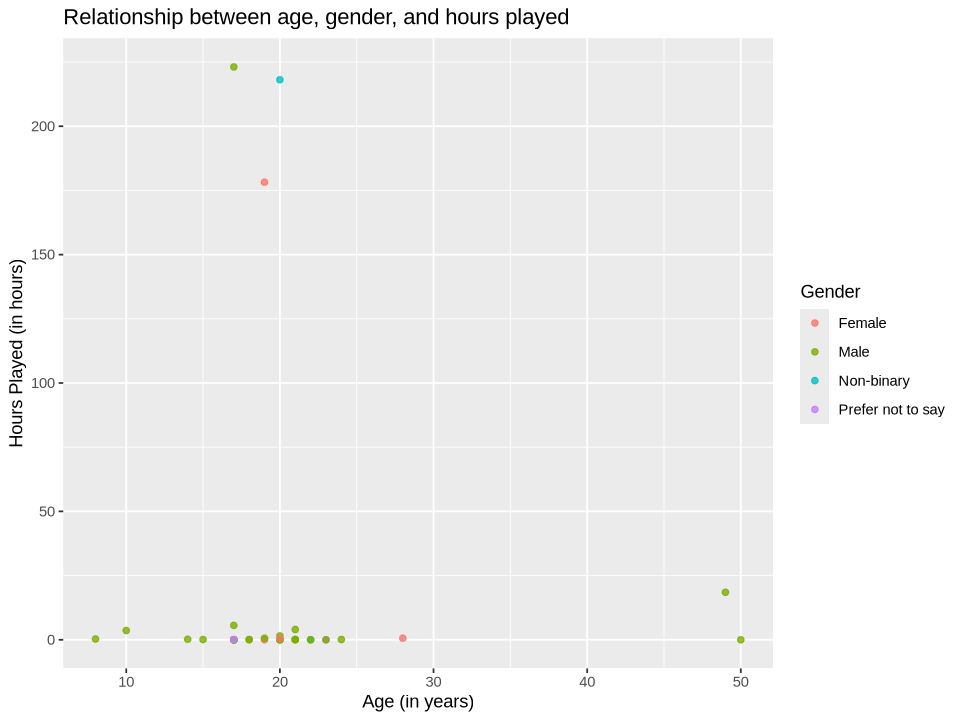

In [3]:
options(repr.plot.width = 8, repr.plot.height = 6)

players_plot <- players_filtered |>
    ggplot(aes(x = Age, y = played_hours, colour = gender)) + 
    geom_point(alpha = 0.8) + # Deals with the transparency of the points, set it to an appropiate value
    labs(x = "Age (in years)", y = "Hours Played (in hours)", colour = "Gender") +
    ggtitle("Relationship between age, gender, and hours played")

players_plot

#### **Observations from the Scatter Plot**  

Most players have **low playtime**, with the majority playing **under 10 hours**. A few **15-25-year-olds** show extremely high playtime (**150-200+ hours**), possibly indicating highly engaged players or data anomalies. There is **no strong correlation** between age and playtime, questioning the idea that younger players play more. While **male players** appear more frequently, extreme playtime occurs across all gender categories, suggesting engagement is **not gender-dependent**. Some players may have unusually high playtime due to **external factors, gaming habits, or possible data entry errors**. Further analysis is needed to confirm trends and check for **data inconsistencies and potential outliers** that could impact results.

## **4. Methods and Plan**  

We will use **linear regression** to examine how `age` and `gender` influence `played_hours` for **Regular** players. This method helps quantify these relationships, allowing us to assess whether younger players tend to play more and if gender affects gaming behavior. However, the model assumes that `age` and `gender` are significant factors, without considering other influences like gaming preferences or external commitments. **Outliers**, such as players with unusually high or low playtime, could skew results and reduce model accuracy.  

To ensure reliable results, we will **split the dataset into 70% training and 30% test data** and apply **cross-validation (CV fold)** to improve accuracy and prevent overfitting. Model performance will be evaluated using **Root Mean Squared Error (RMSE)** and **Root Mean Squared Percentage Error (RMSPE)** to measure how closely predictions match actual playtime. By addressing these limitations and evaluating errors, we aim to determine if `age` and `gender` are meaningful predictors of total playtime for Regular players.